<a href="https://colab.research.google.com/github/duong4595/ib9cw0-text-analytics-23-24/blob/main/Copy_of_Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Text
In this session, we will demonstrate how to perform predictive modeling with text data. We will use the `sms_spam.csv` dataset to analyze and predict whether an SMS is spam or not. We will explore three different approaches to achieve this:
1.	Create word tokens and use TF-IDF values to capture the essence of the text, and use these to predict the outcome.
2. Compute sentiment of the text, and use the sentiment captured in the text to predict the outcome.
3.	Use topic modeling to identify k topics, and use the percentage of each topic captured in the text to predict the outcome.

In a later session, we will also explore using word embeddings for predictive purposes.


In [1]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Read the file

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# upload files using file picker
#from google.colab import files
#files.upload()

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/sms_spam.csv')

In [4]:
df

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


## Preprocess

In [5]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(tokens)



In [27]:
df['text'] = df['text'].apply(preprocess_text)

In [7]:
df

,type,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5569,spam,time tried contact u pound prize claim easy ca...
5570,ham,b going esplanade fr home
5571,ham,pity mood suggestions
5572,ham,guy bitching acted like interested buying some...


##TF-IDF
We will use the 100 most important terms, write them out to the file, and build a prediction model using random forest algorithm.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

##Compute tf-idf and predict based on these

Confusion Matrix:
 [[936  18]
 [ 25 136]]


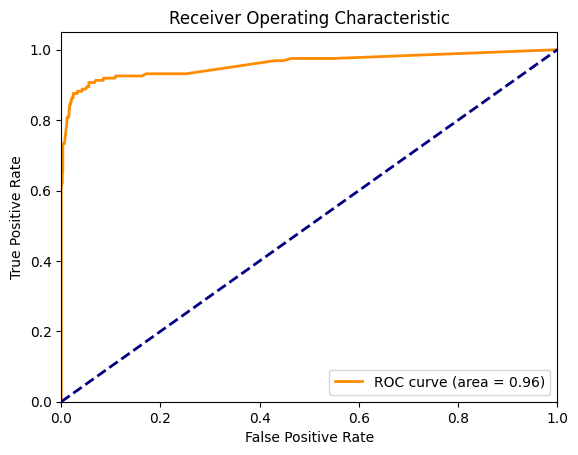

Feature ranking:
1. already (0.151948)
2. also (0.111749)
3. amp (0.064979)
4. anything (0.058615)
5. ask (0.056306)
6. babe (0.041215)
7. back (0.040478)
8. call (0.039692)
9. care (0.037569)
10. cash (0.035096)
11. claim (0.030640)
12. come (0.022712)
13. cos (0.021020)
14. da (0.018070)
15. day (0.014365)
16. dear (0.011785)
17. dont (0.010520)
18. every (0.008683)
19. find (0.008483)
20. free (0.008249)
21. get (0.008077)
22. give (0.007474)
23. go (0.007404)
24. going (0.007217)
25. good (0.007097)
26. got (0.006181)
27. great (0.005917)
28. gt (0.005810)
29. happy (0.005742)
30. hey (0.005134)
31. hi (0.005058)
32. home (0.005048)
33. hope (0.004959)
34. im (0.004739)
35. keep (0.004722)
36. know (0.004610)
37. last (0.004327)
38. later (0.004228)
39. let (0.004193)
40. life (0.004092)
41. like (0.003720)
42. lol (0.003599)
43. lor (0.003140)
44. love (0.003039)
45. lt (0.003024)
46. make (0.002943)
47. meet (0.002803)
48. message (0.002763)
49. miss (0.002758)
50. mobile (0.0027

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np


# Prepare the data using the correct TF-IDF features
vectorizer_corrected = TfidfVectorizer(max_features=100)
tfidf_matrix_corrected = vectorizer_corrected.fit_transform(df['text'])
tfidf_df_corrected = pd.DataFrame(tfidf_matrix_corrected.toarray(), columns=vectorizer_corrected.get_feature_names_out())
df_corrected = pd.concat([df.drop(columns=['text']), tfidf_df_corrected], axis=1)  # Exclude original 'text' column for modeling

# Prepare the data for modeling
X = df_corrected.drop(columns=['type'])  # Features
y = df_corrected['type']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill NaN values with zeros (common practice in TF-IDF where NaN signifies no occurrence of the term)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob,pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

# Print column names
column_names = X_train.columns

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, column_names[f], importances[indices[f]]))


## VADER Sentiment
Compute VADER sentiment and write it to the data frame.

In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each text
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to get sentiment score for each message in the DataFrame
df['vader_sentiment'] = df['text'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
df[['text', 'vader_sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,vader_sentiment
0,go jurong point crazy available bugis n great ...,0.4019
1,ok lar joking wif u oni,0.4767
2,free entry wkly comp win fa cup final tkts may...,0.7964
3,u dun say early hor u c already say,0.0000
4,nah think goes usf lives around though,-0.1027


### Prediction Model

Confusion Matrix:
 [[811 143]
 [146  15]]


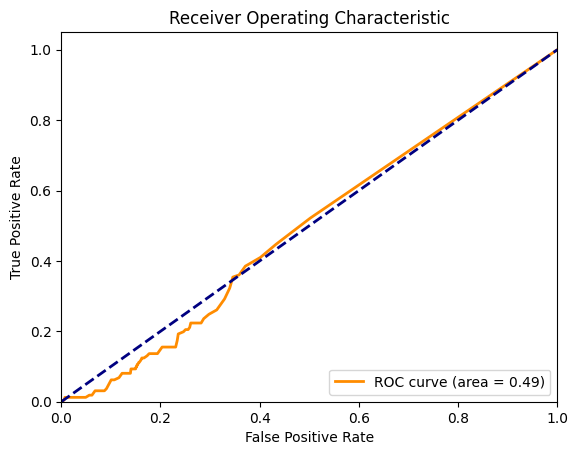

Feature ranking:
1. vader_sentiment (1.000000)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example setup: Assume 'vader_sentiment' column exists in df
# Create sample sentiment data for demonstration (normally you would have real scores here)
import numpy as np
df['vader_sentiment'] = np.random.rand(df.shape[0])  # Random scores for illustration

# Prepare the data for modeling
X = df[['vader_sentiment']]  # Predictor
y= df['type']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob,pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

column_names = X_train.columns

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, column_names[f], importances[indices[f]]))


## Topic Modeling
We use LDA to create 10 topics and write them out to the data frame.

In [12]:
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel

###LDA

In [13]:
# Assuming the text is preprocessed and stored as a list of words in df['text_preprocessed']
# If df['text'] is a single string of words, split it into lists
if isinstance(df['text'].iloc[0], str):
    df['text_preprocessed'] = df['text'].apply(lambda x: x.split())

# Create a Dictionary and Corpus from the preprocessed text
id2word_preprocessed = corpora.Dictionary(df['text_preprocessed'])
corpus_preprocessed = [id2word_preprocessed.doc2bow(text) for text in df['text_preprocessed']]

# Step 2: Initialize and fit the LDA model
lda_model_preprocessed = LdaModel(corpus=corpus_preprocessed, id2word=id2word_preprocessed, num_topics=10, random_state=42, update_every=1, passes=10, alpha='auto', per_word_topics=True)

# Step 3: Extract Topic Distributions
topic_distributions_preprocessed = [lda_model_preprocessed.get_document_topics(bow) for bow in corpus_preprocessed]

# Normalize topic distributions and ensure each document has distribution over all 10 topics
def normalize_topic_distributions(distributions, num_topics=10):
    normalized = []
    for dist in distributions:
        doc_topics = dict(dist)
        normalized.append([doc_topics.get(i, 0) for i in range(num_topics)])
    return normalized

# Normalize topic distributions
normalized_topics_preprocessed = normalize_topic_distributions(topic_distributions_preprocessed)

# Create DataFrame with topic distributions
topics_df_preprocessed = pd.DataFrame(normalized_topics_preprocessed, columns=[f"Topic{i+1}" for i in range(10)])

# Concatenate original DataFrame with topics DataFrame
df_with_topics_gensim_preprocessed = pd.concat([df, topics_df_preprocessed], axis=1)

# Display the DataFrame with topics
df_with_topics_gensim_preprocessed.head()


,type,text,vader_sentiment,text_preprocessed,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,ham,go jurong point crazy available bugis n great ...,0.744621,"[go, jurong, point, crazy, available, bugis, n...",0.000000,0.000000,0.000000,0.000000,0.000000,0.648002,0.313113,0.000000,0.000000,0.000
1,ham,ok lar joking wif u oni,0.833800,"[ok, lar, joking, wif, u, oni]",0.014509,0.018814,0.010632,0.593157,0.013216,0.011514,0.308938,0.010747,0.000000,0.000
2,spam,free entry wkly comp win fa cup final tkts may...,0.416955,"[free, entry, wkly, comp, win, fa, cup, final,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.963456,0.000
3,ham,u dun say early hor u c already say,0.183598,"[u, dun, say, early, hor, u, c, already, say]",0.010082,0.013072,0.000000,0.000000,0.000000,0.153807,0.779640,0.000000,0.000000,0.000
4,ham,nah think goes usf lives around though,0.027232,"[nah, think, goes, usf, lives, around, though]",0.012655,0.016398,0.000000,0.000000,0.198846,0.010043,0.011900,0.188470,0.000000,0.536


###Predict and Compute Performance Metrics

Confusion Matrix:
 [[934  20]
 [ 48 113]]


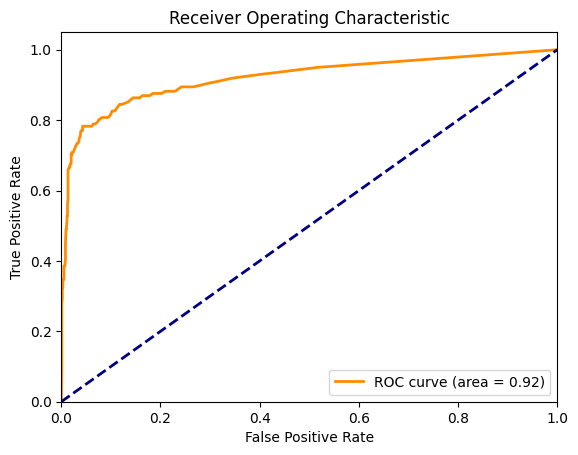

,Feature,Importance
1,Topic2,0.220804
8,Topic9,0.187389
0,Topic1,0.152894
6,Topic7,0.099744
4,Topic5,0.096845
5,Topic6,0.071946
2,Topic3,0.066992
3,Topic4,0.052372
7,Topic8,0.051014


In [14]:
# Prepare the data for modeling, excluding one topic for independence
X = df_with_topics_gensim_preprocessed[[f"Topic{i+1}" for i in range(9)]]  # Using Topic1 to Topic9
y = df_with_topics_gensim_preprocessed['type']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC curve and AUC if both classes are present in the test set
if len(np.unique(y_test)) > 1:
    y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve not plotted. The test set does not contain both classes.")

# Feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances


# Your Turn


## Roomba

1.	 Read the `Roomba.csv` file. Create a new variable called `rating` which has values `high` and `low`. If the `Stars` value is 4 or 5, then `rating` should be `high`, otherwise `low`. Build models to predict `rating` based on `Review`. Conduct topic modeling (10 topics) and sentiments of `Review` and use these to predict  `rating`.

In [132]:
roomba_df = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/Roomba.csv')

### Preprocess

In [139]:
roomba_df = roomba_df.dropna()

roomba_df['review_preprocessed'] = roomba_df['Review'].apply(preprocess_text)

#Assign high and low
roomba_df['rating_class'] = roomba_df['Stars'].apply(lambda x: 1 if x > 4 else 0)

### TF-IDF

In [141]:
# Prepare the data using the correct TF-IDF features
roomba_vectorizer_corrected = TfidfVectorizer(max_features=100)
roomba_tfidf_matrix_corrected = roomba_vectorizer_corrected.fit_transform(roomba_df['review_preprocessed'])
roomba_tfidf_df_corrected = pd.DataFrame(roomba_tfidf_matrix_corrected.toarray(),
                                  columns=roomba_vectorizer_corrected.get_feature_names_out())
roomba_df_corrected = pd.concat([roomba_df.drop(columns=['review_preprocessed', 'Review', 'Date',
                                                         'Product', 'Stars', 'Title']),
                          roomba_tfidf_df_corrected], axis=1)  # Exclude original 'review' column for modeling

# Prepare the data for modeling
roomba_X = roomba_df_corrected.drop(columns=['rating_class'])  # Features
roomba_y = roomba_df_corrected['rating_class']  # Target

# Split data into training and testing sets
roomba_X_train, roomba_X_test, roomba_y_train, roomba_y_test = train_test_split(roomba_X, roomba_y,
                                                                                test_size=0.2, random_state=42)

# Fill NaN values with zeros (common practice in TF-IDF where NaN signifies no occurrence of the term)
roomba_X_train = roomba_X_train.fillna(0)
roomba_y_train = roomba_y_train.fillna(0)
roomba_X_test = roomba_X_test.fillna(0)

Confusion Matrix:
 [[ 5 31]
 [ 7 84]]


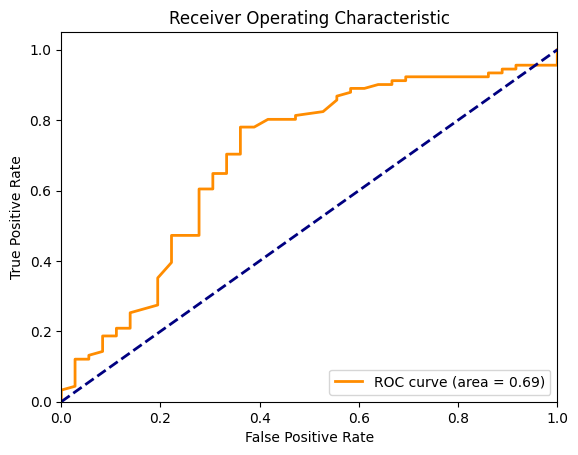

Feature ranking:
1. also (0.026455)
2. always (0.022656)
3. amazing (0.021036)
4. area (0.020782)
5. around (0.020715)
6. back (0.020675)
7. battery (0.020514)
8. best (0.019479)
9. better (0.019457)
10. bin (0.018814)
11. brushes (0.018691)
12. carpet (0.018512)
13. cat (0.018102)
14. cats (0.017756)
15. clean (0.016573)
16. cleaner (0.016393)
17. cleaning (0.015508)
18. cleans (0.015366)
19. could (0.015310)
20. couple (0.015220)
21. day (0.014263)
22. days (0.014070)
23. dirt (0.013896)
24. dog (0.013842)
25. dogs (0.013648)
26. dust (0.013508)
27. easy (0.013092)
28. empty (0.012421)
29. even (0.012380)
30. ever (0.012183)
31. every (0.012109)
32. far (0.011977)
33. find (0.011705)
34. first (0.011069)
35. floor (0.010837)
36. floors (0.010829)
37. furniture (0.010715)
38. get (0.010671)
39. gets (0.010167)
40. getting (0.010025)
41. go (0.010000)
42. goes (0.009614)
43. going (0.009461)
44. good (0.009171)
45. got (0.009154)
46. great (0.009090)
47. hair (0.009071)
48. hard (0.008

In [142]:
# Initialize and train the Random Forest classifier
roomba_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
roomba_rf_classifier.fit(roomba_X_train, roomba_y_train)

# Predict on the test set
roomba_y_pred = roomba_rf_classifier.predict(roomba_X_test)
roomba_y_prob = roomba_rf_classifier.predict_proba(roomba_X_test)[:, 1]  # probabilities for ROC curve

# Confusion Matrix
roomba_conf_matrix = confusion_matrix(roomba_y_test, roomba_y_pred)
print("Confusion Matrix:\n", roomba_conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(roomba_y_test, roomba_y_prob, pos_label= 1) #1 = High
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
roomba_importances = roomba_rf_classifier.feature_importances_
roomba_indices = np.argsort(roomba_importances)[::-1]
print("Feature ranking:")

# Print column names
roomba_column_names = roomba_X_train.columns

for f in range(roomba_X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, roomba_column_names[f], roomba_importances[roomba_indices[f]]))

### VADER Sentiment

In [144]:
# Apply the function to get sentiment score for each message in the DataFrame
roomba_df['vader_sentiment'] = roomba_df['review_preprocessed'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
roomba_df[['Review', 'vader_sentiment']].sample(10)


,Review,vader_sentiment
363,"This is a must have, the Roomba works great. I...",0.8126
55,works better than I ever imagined,0.4404
482,Roomba failed after 16 months of light use one...,-0.7574
226,Truly man has met his match both in intellect ...,0.9661
110,We spent the first 30 minutes just watching it...,0.4404
553,One of my favorite purchases ever. I have a do...,0.9062
416,The charger is not compatable to the wall dock...,0.3612
431,"still working great, weekly cleaning of teh ro...",0.7717
441,"So far, 4 1/2 stars.I purchased the 650 2+ yea...",0.9542
20,works well,0.2732


Confusion Matrix:
 [[10 27]
 [24 66]]


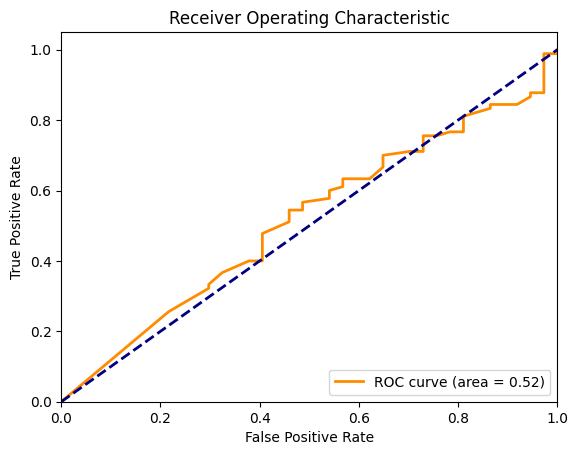

Feature ranking:
1. vader_sentiment (1.000000)


In [145]:
# Create sample sentiment data for demonstration (normally you would have real scores here)
roomba_df['vader_sentiment'] = np.random.rand(roomba_df.shape[0])  # Random scores for illustration

# Prepare the data for modeling
X = roomba_df[['vader_sentiment']]  # Predictor
y= roomba_df['rating_class']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob,pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

column_names = X_train.columns

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, column_names[f], importances[indices[f]]))


### Topic Modelling

In [147]:
# Assuming the text is preprocessed and stored as a list of words in df['text_preprocessed']
# If df['text'] is a single string of words, split it into lists
if isinstance(roomba_df['Review'].iloc[0], str):
    roomba_df['review_preprocessed'] = roomba_df['Review'].apply(lambda x: x.split())

# Create a Dictionary and Corpus from the preprocessed text
id2word_preprocessed = corpora.Dictionary(roomba_df['review_preprocessed'])
corpus_preprocessed = [id2word_preprocessed.doc2bow(text) for text in roomba_df['review_preprocessed']]

# Step 2: Initialize and fit the LDA model
lda_model_preprocessed = LdaModel(corpus=corpus_preprocessed, id2word=id2word_preprocessed,
                                  num_topics=10, random_state=42, update_every=1, passes=10, alpha='auto',
                                  per_word_topics=True)

# Step 3: Extract Topic Distributions
topic_distributions_preprocessed = [lda_model_preprocessed.get_document_topics(bow) for bow in corpus_preprocessed]

# Normalize topic distributions and ensure each document has distribution over all 10 topics
def normalize_topic_distributions(distributions, num_topics=10):
    normalized = []
    for dist in distributions:
        doc_topics = dict(dist)
        normalized.append([doc_topics.get(i, 0) for i in range(num_topics)])
    return normalized

# Normalize topic distributions
normalized_topics_preprocessed = normalize_topic_distributions(topic_distributions_preprocessed)

# Create DataFrame with topic distributions
topics_df_preprocessed = pd.DataFrame(normalized_topics_preprocessed, columns=[f"Topic{i+1}" for i in range(10)])

# Concatenate original DataFrame with topics DataFrame
df_with_topics_gensim_preprocessed = pd.concat([roomba_df, topics_df_preprocessed], axis=1)

# Display the DataFrame with topics
df_with_topics_gensim_preprocessed.head()


,Date,Product,Stars,Title,Review,review_preprocessed,rating_class,vader_sentiment,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,2/28/15,iRobot Roomba 650 for Pets,5.0,Five Stars,You would not believe how well this works,"[You, would, not, believe, how, well, this, wo...",1.0,0.185896,0.0,0.029124,0.0,0.000000,0.938060,0.0,0.0,0.0,0.000000,0.0
1,1/12/15,iRobot Roomba 650 for Pets,4.0,Four Stars,You just walk away and it does the rest,"[You, just, walk, away, and, it, does, the, rest]",0.0,0.462807,0.0,0.960713,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,12/26/13,iRobot Roomba 650 for Pets,5.0,Awesome love it.,You have to Roomba proof your house but once t...,"[You, have, to, Roomba, proof, your, house, bu...",1.0,0.820921,0.0,0.937832,0.0,0.000000,0.000000,0.0,0.0,0.0,0.047059,0.0
3,8/4/13,iRobot Roomba 650 for Pets,3.0,Love-hate this vaccuum,"Yes, it's a fascinating, albeit expensive, bit...","[Yes,, it's, a, fascinating,, albeit, expensiv...",0.0,0.674320,0.0,0.255565,0.0,0.740502,0.000000,0.0,0.0,0.0,0.000000,0.0
4,12/22/15,iRobot Roomba 650 for Pets,5.0,This vacuum is fantastic!!,Years ago I bought one of the original Roomba'...,"[Years, ago, I, bought, one, of, the, original...",1.0,0.092158,0.0,0.000000,0.0,0.000000,0.997349,0.0,0.0,0.0,0.000000,0.0


Confusion Matrix:
 [[ 7 29]
 [18 73]]


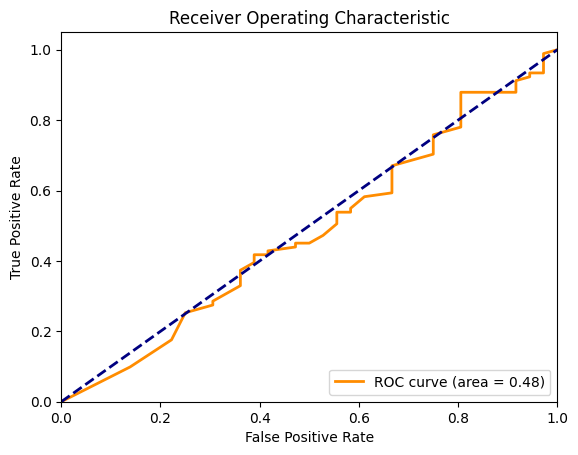

,Feature,Importance
1,Topic2,0.575715
4,Topic5,0.250347
3,Topic4,0.040761
8,Topic9,0.030204
0,Topic1,0.023982
2,Topic3,0.023152
7,Topic8,0.019237
5,Topic6,0.018591
6,Topic7,0.018010


In [151]:
# Prepare the data for modeling, excluding one topic for independence
X = df_with_topics_gensim_preprocessed[[f"Topic{i+1}" for i in range(9)]]  # Using Topic1 to Topic9
y = df_with_topics_gensim_preprocessed['rating_class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC curve and AUC if both classes are present in the test set
if len(np.unique(y_test)) > 1:
    y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label= 1)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve not plotted. The test set does not contain both classes.")

# Feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances


## IMDB

2.	Read the `imdb.csv` file and predict the sentiment based on the review of the movie.

In [153]:
imdb = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/imdb.csv')

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9994,"First off, this is the worst movie I've ever s...",negative
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative


### Preprocess

In [155]:
imdb = imdb.dropna()

imdb['review_preprocessed'] = imdb['review'].apply(preprocess_text)

,review,sentiment,review_preprocessed
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
9994,"First off, this is the worst movie I've ever s...",negative,first worst movie ever seen may make want see ...
9995,"Fun, entertaining movie about WWII German spy ...",positive,fun entertaining movie wwii german spy julie a...
9996,Give me a break. How can anyone say that this ...,negative,give break anyone say good hockey movie know m...
9997,This movie is a bad movie. But after watching ...,negative,movie bad movie watching endless series bad ho...


### TF-IDF

In [158]:
# Prepare the data using the correct TF-IDF features
imdb_vectorizer_corrected = TfidfVectorizer(max_features=100)
imdb_tfidf_matrix_corrected = imdb_vectorizer_corrected.fit_transform(imdb['review_preprocessed'])
imdb_tfidf_df_corrected = pd.DataFrame(imdb_tfidf_matrix_corrected.toarray(),
                                  columns=imdb_vectorizer_corrected.get_feature_names_out())
imdb_df_corrected = pd.concat([imdb.drop(columns=['review_preprocessed', 'review']),
                          imdb_tfidf_df_corrected], axis=1)  # Exclude original 'review' column for modeling

# Prepare the data for modeling
imdb_X = imdb_df_corrected.drop(columns=['sentiment'])  # Features
imdb_y = imdb_df_corrected['sentiment']  # Target

# Split data into training and testing sets
imdb_X_train, imdb_X_test, imdb_y_train, imdb_y_test = train_test_split(imdb_X, imdb_y,
                                                                                test_size=0.2, random_state=42)

# Fill NaN values with zeros (common practice in TF-IDF where NaN signifies no occurrence of the term)
imdb_X_train = imdb_X_train.fillna(0)
imdb_y_train = imdb_y_train.fillna(0)
imdb_X_test = imdb_X_test.fillna(0)

Confusion Matrix:
 [[703 257]
 [277 763]]


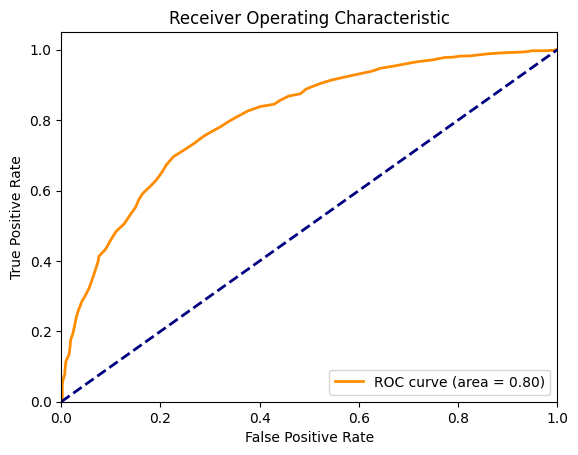

Feature ranking:
1. acting (0.059040)
2. actors (0.039599)
3. actually (0.025904)
4. also (0.021234)
5. another (0.020606)
6. around (0.020379)
7. back (0.020047)
8. bad (0.019459)
9. best (0.018909)
10. better (0.018571)
11. big (0.018045)
12. br (0.017254)
13. ca (0.017015)
14. cast (0.016692)
15. character (0.015054)
16. characters (0.014035)
17. come (0.013903)
18. could (0.013437)
19. director (0.013164)
20. end (0.011997)
21. enough (0.011802)
22. even (0.011445)
23. ever (0.011205)
24. every (0.011042)
25. fact (0.010893)
26. film (0.010833)
27. films (0.010588)
28. find (0.010122)
29. first (0.009916)
30. funny (0.009517)
31. get (0.009495)
32. give (0.009311)
33. go (0.009280)
34. going (0.009255)
35. good (0.009124)
36. got (0.009091)
37. great (0.008917)
38. horror (0.008881)
39. however (0.008798)
40. know (0.008541)
41. life (0.008478)
42. like (0.008447)
43. little (0.008006)
44. long (0.007957)
45. look (0.007920)
46. lot (0.007835)
47. love (0.007802)
48. made (0.007777

In [161]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(imdb_X_train, imdb_y_train)

# Predict on the test set
y_pred = rf_classifier.predict(imdb_X_test)
y_prob = rf_classifier.predict_proba(imdb_X_test)[:, 1]  # probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(imdb_y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(imdb_y_test, y_prob, pos_label= 'positive') #1 = High
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

# Print column names
column_names = imdb_X_train.columns

for f in range(imdb_X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, column_names[f], importances[indices[f]]))

### VADER Sentiment

In [ ]:
# Apply the function to get sentiment score for each message in the DataFrame
imdb['vader_sentiment'] = imdb['review_preprocessed'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
imdb[['review', 'vader_sentiment']].sample(10)


Confusion Matrix:
 [[475 485]
 [532 508]]


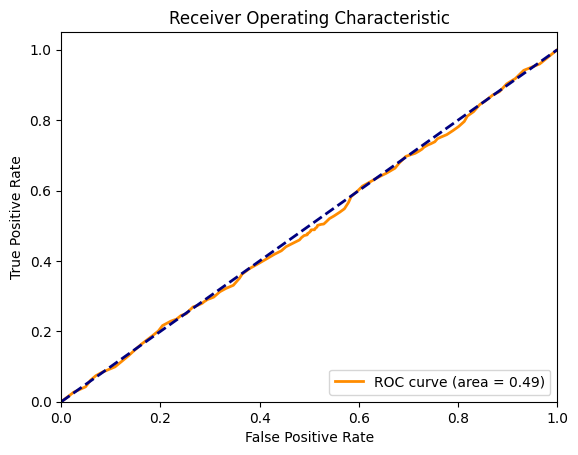

Feature ranking:
1. vader_sentiment (1.000000)


In [165]:
# Create sample sentiment data for demonstration (normally you would have real scores here)
imdb['vader_sentiment'] = np.random.rand(imdb.shape[0])  # Random scores for illustration

# Prepare the data for modeling
X = imdb[['vader_sentiment']]  # Predictor
y= imdb['sentiment']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob,pos_label = 'positive')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

column_names = X_train.columns

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, column_names[f], importances[indices[f]]))


### Topic Modelling

In [167]:
# Assuming the text is preprocessed and stored as a list of words in df['text_preprocessed']
# If df['text'] is a single string of words, split it into lists
if isinstance(imdb['review'].iloc[0], str):
    imdb['review_preprocessed'] = imdb['review'].apply(lambda x: x.split())

# Create a Dictionary and Corpus from the preprocessed text
id2word_preprocessed = corpora.Dictionary(imdb['review_preprocessed'])
corpus_preprocessed = [id2word_preprocessed.doc2bow(text) for text in imdb['review_preprocessed']]

# Step 2: Initialize and fit the LDA model
lda_model_preprocessed = LdaModel(corpus=corpus_preprocessed, id2word=id2word_preprocessed,
                                  num_topics=10, random_state=42, update_every=1, passes=10, alpha='auto',
                                  per_word_topics=True)

# Step 3: Extract Topic Distributions
topic_distributions_preprocessed = [lda_model_preprocessed.get_document_topics(bow) for bow in corpus_preprocessed]

# Normalize topic distributions and ensure each document has distribution over all 10 topics
def normalize_topic_distributions(distributions, num_topics=10):
    normalized = []
    for dist in distributions:
        doc_topics = dict(dist)
        normalized.append([doc_topics.get(i, 0) for i in range(num_topics)])
    return normalized

# Normalize topic distributions
normalized_topics_preprocessed = normalize_topic_distributions(topic_distributions_preprocessed)

# Create DataFrame with topic distributions
topics_df_preprocessed = pd.DataFrame(normalized_topics_preprocessed, columns=[f"Topic{i+1}" for i in range(10)])

# Concatenate original DataFrame with topics DataFrame
df_with_topics_gensim_preprocessed = pd.concat([imdb, topics_df_preprocessed], axis=1)

# Display the DataFrame with topics
df_with_topics_gensim_preprocessed.head()


,review,sentiment,review_preprocessed,vader_sentiment,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",0.733195,0,0.174150,0.0,0.825505,0.0,0,0.0,0.0,0.0,0
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production., <br, /><br...",0.854078,0,0.477961,0.0,0.521377,0.0,0,0.0,0.0,0.0,0
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",0.800796,0,0.117862,0.0,0.881509,0.0,0,0.0,0.0,0.0,0
3,Basically there's a family where a little boy ...,negative,"[Basically, there's, a, family, where, a, litt...",0.522003,0,0.081019,0.0,0.918231,0.0,0,0.0,0.0,0.0,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",0.536809,0,0.658904,0.0,0.340650,0.0,0,0.0,0.0,0.0,0


Confusion Matrix:
 [[546 414]
 [465 575]]


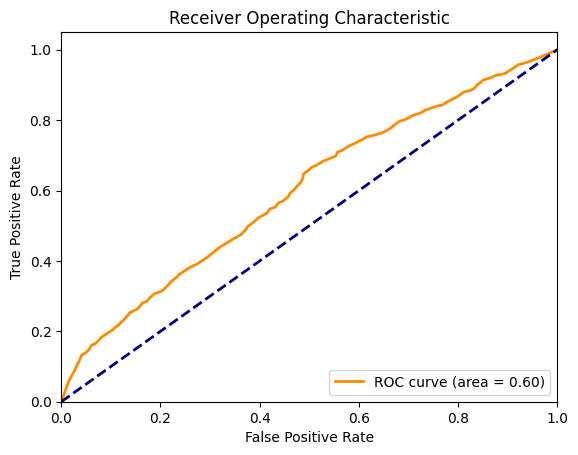

,Feature,Importance
3,Topic4,0.547233
1,Topic2,0.442724
4,Topic5,0.004712
8,Topic9,0.003261
7,Topic8,0.000899
6,Topic7,0.000787
2,Topic3,0.000385
0,Topic1,0.000000
5,Topic6,0.000000


In [168]:
# Prepare the data for modeling, excluding one topic for independence
X = df_with_topics_gensim_preprocessed[[f"Topic{i+1}" for i in range(9)]]  # Using Topic1 to Topic9
y = df_with_topics_gensim_preprocessed['sentiment']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate ROC curve and AUC if both classes are present in the test set
if len(np.unique(y_test)) > 1:
    y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label= 'positive')
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve not plotted. The test set does not contain both classes.")

# Feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances
